In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as pltN

# Free Surface Profile when $\alpha < 0.25$

In [11]:
from scipy.integrate import quad
from numpy import sin, exp, cos

U = 1
g = 1.05
rho = 1
T = 1
mu_1 = 0
alpha = 0.27

def f(a):
    B = np.exp(-0.5*a**2)
#     D = a - g/U**2 - T*a**2/(rho*U**2)-1j*mu_1
    D = a - g/U**2 - U**2/g*alpha*a**2-1j*mu_1
    return (2/(rho*U**2)*B/D)

def get_x_FT(f, x):
    x_FT_integrand_real = lambda a: np.real(f(a)*np.exp(np.pi*1j*a*x))
    x_FT_integrand_comp = lambda a: np.imag(f(a)*np.exp(np.pi*1j*a*x))
    x_FT_real = quad(x_FT_integrand_real, 0, np.inf)[0]
    x_FT_comp = quad(x_FT_integrand_comp, 0, np.inf)[0]
    return -0.0001*(x_FT_real) + -0.0001*1j*x_FT_comp

print(get_x_FT(f,0.001))


(0.0008489463223370942+3.3820092090434734e-06j)


In [12]:
x = np.linspace(-10, 10, 100)
x_FT = np.vectorize(get_x_FT)(f, x )

Text(0.5, 0, 'x')

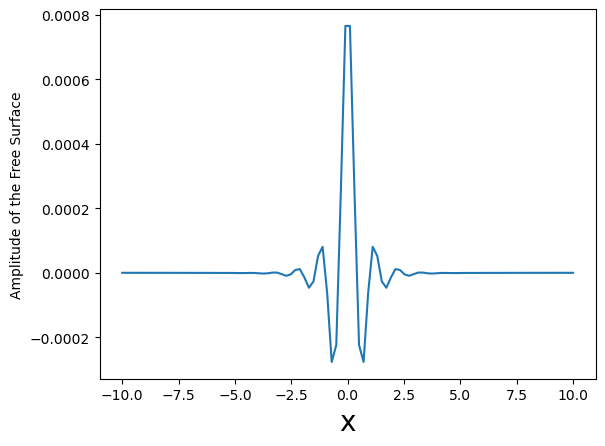

In [13]:
# plt.plot(x, np.abs(x_FT))
plt.plot(x, np.real(x_FT))
# plt.ylabel('$|\hat{x}(f)|$', fontsize=20)
plt.ylabel('Amplitude of the Free Surface')
# plt.xlabel('$f$', fontsize=20)
plt.xlabel('x', fontsize=20)
plt.tile('Free Surface Profile')

# Free Surface Profile when $\alpha>0.25$

In [15]:
from scipy.integrate import quad
from numpy import sin, exp, cos

U = 4
g = 9.81
rho = 1
T = 1
# mu_1 = 0.01
mu_1 = 0.001
alpha = 0.222

def f(a):
    B = np.exp(-0.5*a**2)
#     D = a - g/U**2 - T*a**2/(rho*U**2)-1j*mu_1
    D = a - g/U**2 - U**2/g*alpha*a**2-1j*mu_1
    return (2/(rho*U**2)*B/D)

def get_x_FT(f, x):
    x_FT_integrand_real = lambda a: np.real(f(a)*np.exp(np.pi*1j*a*x))
    x_FT_integrand_comp = lambda a: np.imag(f(a)*np.exp(np.pi*1j*a*x))
    x_FT_real = quad(x_FT_integrand_real, 0, np.inf)[0]
    x_FT_comp = quad(x_FT_integrand_comp, 0, np.inf)[0]
    return -0.0001*(x_FT_real) + -0.0001*1j*x_FT_comp

print(get_x_FT(f,0.001))


(-9.43717520285863e-06-9.851263206316288e-05j)


In [16]:
x = np.linspace(-10, 10, 100)
x_FT = np.vectorize(get_x_FT)(f, x )

Text(0.5, 0, 'x')

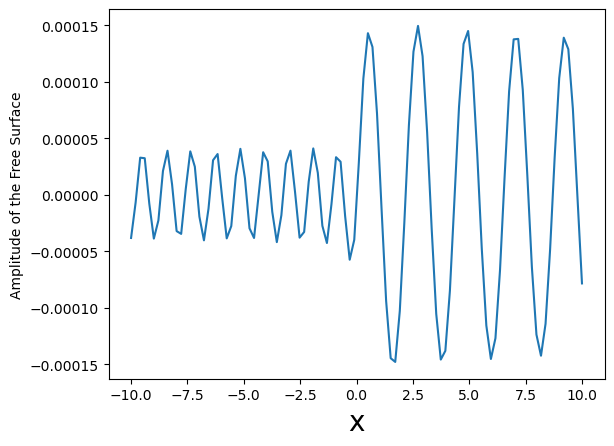

In [17]:
# plt.plot(x, np.abs(x_FT))
plt.plot(x, np.real(x_FT))
# plt.ylabel('$|\hat{x}(f)|$', fontsize=20)
plt.ylabel('Amplitude of the Free Surface')
# plt.xlabel('$f$', fontsize=20)
plt.xlabel('x', fontsize=20)

# Non-Uniformity

In [18]:
import numpy as np
from scipy.integrate import quad
from numpy import sin, exp, cos
import matplotlib.pyplot as plt

U = 4
g = 9.81
rho = 1
T = 1
# mu_1 = 0.01
mu_1 = 0.001
# alpha = 0.222

def f(a , alpha):
    B = np.exp(-0.5*a**2)
#     D = a - g/U**2 - T*a**2/(rho*U**2)-1j*mu_1
    D = a - g/U**2 - U**2/g*alpha*a**2
    return (2/(rho*U**2)*B/D)

def get_x_FT(f, y):
    x_FT_integrand_real = lambda a: np.real(f(a,y))
    x_FT_integrand_comp = lambda a: np.imag(f(a,y))
    x_FT_real = quad(x_FT_integrand_real, 0, np.inf)[0]
    x_FT_comp = quad(x_FT_integrand_comp, 0, np.inf)[0]
    return -0.0001*(x_FT_real) + -0.0001*1j*(x_FT_comp)

# print(quad(f,0,np.inf)[0])
print(get_x_FT(f,0.27))


(0.0001223385723732415+0j)


In [19]:
x = np.linspace(0.25, 0.26, 100)
x_FT = np.vectorize(get_x_FT)(f, x )


C:\Users\HP\AppData\Local\Temp\ipykernel_14684\4264666167.py:23: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  x_FT_real = quad(x_FT_integrand_real, 0, np.inf)[0]


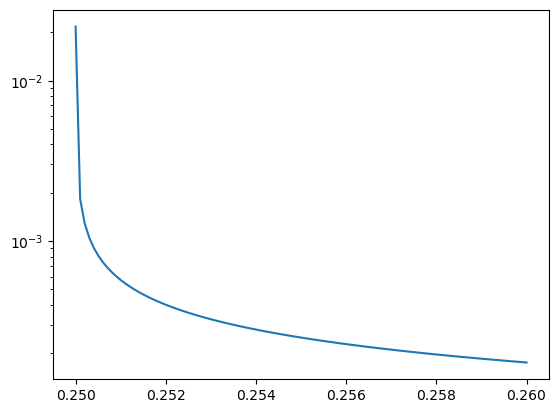

In [22]:
# plt.plot(x, np.abs(x_FT))
plt.plot(x, np.real(x_FT))
# plt.ylabel('$|\hat{x}(f)|$', fontsize=20)
# plt.ylabel('Amplitude at x=0')
# plt.xlabel('$f$', fontsize=20)
# plt.xlabel('Capillary Number')
plt.yscale('log')

# Dispersion Relation


Text(5.8999999999999995, 0.1, 'a2 ')

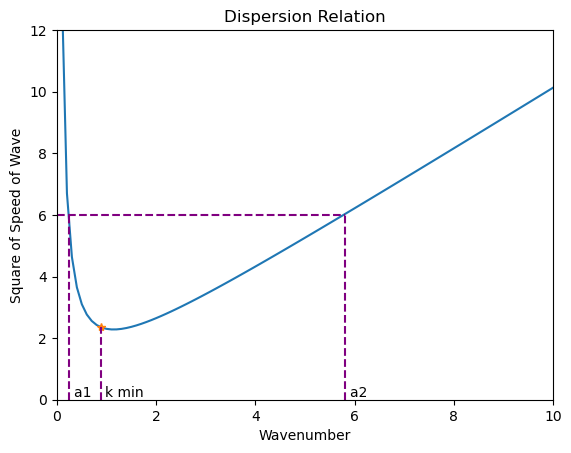

In [2]:
T = 1
h = 1
rho = 1
g= 1.3
k_min = np.sqrt(T/(rho*g))

U=6

a_1 = (rho*U^2)/(2*T)*(1-np.sqrt(1-(4*T*g)/(rho*(U**4))))
a_2 = (rho*U^2)/(2*T)*(1+np.sqrt(1-(4*T*g)/(rho*U**4)))

def c(k):
    s = g/k+T*k/rho
    return s
x = np.linspace(0.1,10,100)
ys = c(x)

plt.plot(x,ys)
plt.xlabel('Wavenumber')
plt.ylabel('Square of Speed of Wave')
plt.title('Dispersion Relation')
plt.ylim(0,12)
plt.xlim(0,10)
plt.plot(k_min , c(k_min) , marker = '*')
plt.vlines(x = k_min, ymin = 0, ymax = c(k_min),colors = 'purple', linestyles = 'dashed')
plt.annotate('k min' , xy = (k_min+0.1,0.1))

plt.hlines(y= U, xmin = 0 , xmax = 5.8 , colors = 'purple',  linestyles = 'dashed')

plt.vlines(x=0.25 , ymin = 0 , ymax = U , colors = 'purple' , linestyles = 'dashed')

plt.vlines(x=5.8 , ymin = 0 , ymax = U , colors = 'purple' , linestyles = 'dashed')

a_1 = 0.25
a_2 = 5.8

plt.annotate('a1 ' , xy = (a_1+0.1,0.1))

plt.annotate('a2 ' , xy = (a_2+0.1,0.1))



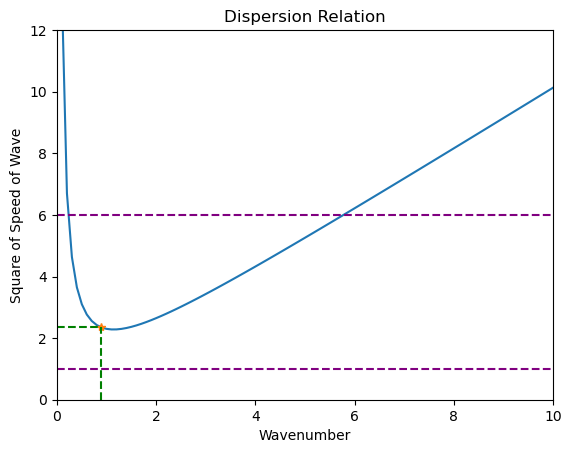

In [9]:
T = 1
h = 1
rho = 1
g= 1.3
k_min = np.sqrt(T/(rho*g))

U=6

a_1 = (rho*U^2)/(2*T)*(1-np.sqrt(1-(4*T*g)/(rho*(U**4))))
a_2 = (rho*U^2)/(2*T)*(1+np.sqrt(1-(4*T*g)/(rho*U**4)))

def c(k):
    s = g/k+T*k/rho
    return s
x = np.linspace(0.1,10,100)
ys = c(x)

plt.plot(x,ys)
plt.xlabel('Wavenumber')
plt.ylabel('Square of Speed of Wave')
plt.title('Dispersion Relation')
plt.ylim(0,12)
plt.xlim(0,10)
plt.plot(k_min , c(k_min) , marker = '*')
plt.vlines(x = k_min, ymin = 0, ymax = c(k_min),colors = 'green', linestyles = 'dashed')
# plt.annotate('k min' , xy = (k_min+0.1,0.1))

plt.hlines(y= c(k_min), xmin = 0 , xmax = k_min , colors = 'green',  linestyles = 'dashed')

plt.hlines(y= U, xmin = 0 , xmax = 10 , colors = 'purple',  linestyles = 'dashed')

plt.hlines(y= 1, xmin = 0 , xmax = 10 , colors = 'purple',  linestyles = 'dashed')

# plt.annotate('' , xy = (k_min+0.1,0.1))

# plt.vlines(x=0.25 , ymin = 0 , ymax = U , colors = 'purple' , linestyles = 'dashed')

# plt.vlines(x=5.8 , ymin = 0 , ymax = U , colors = 'purple' , linestyles = 'dashed')

a_1 = 0.25
a_2 = 5.8

# plt.annotate('a1 ' , xy = (a_1+0.1,0.1))

# plt.annotate('a2 ' , xy = (a_2+0.1,0.1))

